# BACKPROPAGATION IMPLEMENTATION

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.special import expit

In [2]:
os.chdir("C:/Users/mipec/school/sem6/Metody Inteligencji Obliczeniowej w Analizie Danych/")
os.getcwd()
data_train = pd.read_csv("./dane/regression/square-simple-training.csv", index_col = 0)
data_test = pd.read_csv("./dane/regression/square-simple-test.csv", index_col = 0)

X_train = np.asarray(data_train['x']).reshape(-1,1)
Y_train = np.asarray(data_train['y']).reshape(-1,1)

X_test = np.asarray(data_test['x']).reshape(-1,1)
Y_test = np.asarray(data_test['y']).reshape(-1,1)

In [29]:
class MLP():
    def __init__(self, neurons, activation = 'sigmoid', activation_out = 'linear'):
        self.neurons = neurons
        self.weights = []
        self.biases = []
        self.activation = self.activ[activation]
        self.derivative = self.deriv[activation]
        self.outputActivation = self.activ[activation_out]
        self.outputDerivative = self.deriv[activation_out]
        self.dw_mean = []
        self.db_mean = []

        for i in range(len(self.neurons) - 1):
            self.weights += [np.random.uniform(-1, 1, neurons[i] * neurons[i + 1]).reshape(neurons[i], neurons[i + 1])]
            self.biases += [np.random.uniform(-1, 1, neurons[i + 1]).reshape(1, neurons[i+1])]
        
        pass

    activ = {
        'sigmoid': (lambda x: expit(x)),
        'tanh': (lambda x: np.tanh(x)),
        'Relu': (lambda x: np.multiply(x, x > 0)),
        'linear' : (lambda x: np.array(x))
    }
    deriv = {
        'sigmoid': (lambda x: expit(x)*(1-expit(x))),
        'tanh': (lambda x: 1-x**2),
        'Relu': (lambda x: 1 * (x>0)),
        'linear': (lambda x: 1)
    }



    def plot_weights(self):
        vmin = np.inf
        vmax = -np.inf
        gridsize = []
        wb = []
        for i in range(len(self.weights)):
            wb.append(np.concatenate([self.weights[i],[self.biases[i]]]))
        for i in wb:
            vmin = min(vmin, np.min(i))
            vmax = max(vmax, np.max(i))
            gridsize = gridsize + [np.shape(i)[1]]
        gridsize = gridsize + [0.2]

        fig, ax = plt.subplots(1, len(wb)+1, gridspec_kw=dict(width_ratios=gridsize))

        for i in range(len(wb)):
            sns.heatmap(wb[i], annot=True, cbar=False, ax=ax[i], vmin=vmin, vmax = vmax)
        #     im = ax[i].imshow(wb[i])

            labels = list(map(str, np.arange(len(wb[i])-1)))
            labels.append("bias")

            ax[i].set_yticks(np.arange(len(wb[i]))+0.5)
            ax[i].set_yticklabels(labels = labels)
            ax[i].set_xticks(range(len(wb[i][i])))
            ax[i].set_xticklabels(range(len(wb[i][i])))
            ax[i].set_title(f"{i+1}. hidden layer ")

        ax[-2].set_title("output layer")
        fig.colorbar(ax[0].collections[0], cax=ax[len(wb)])
        plt.show()


    
    def mse(self, y, y_hat):
        return np.square(np.subtract(y, y_hat)).mean()
    

    def forward(self, x): #forwardujemy pojednynczy input przez sieć
        self.A = [x]
        self.Z = []

        for layer in range(len(self.neurons)-2):
            net = np.dot(self.A[-1], self.weights[layer]) + self.biases[layer]
            output = self.activation(net)
            self.Z += [net]
            self.A += [output]
        net = np.dot(self.A[-1], self.weights[-1]) + self.biases[-1]
        y_hat = self.outputActivation(net) 
        
        self.Z += [net]
        self.A += [y_hat]
    
        return y_hat
    


    def backprop(self, y):
        m = y.shape[0]
        Errors = [None] * len(self.weights)

        Errors[-1] = y - self.A[-1]

        for i in reversed(range(len(Errors)-1)):
            Errors[i] = (np.dot(self.weights[i+1], Errors[i+1].T) * self.derivative(self.Z[i]).T).T
    
        dw = [None] * len(Errors)
        db = [None] * len(Errors)

        for i, e in enumerate(Errors):
            dw[i] = np.dot(e.T, self.A[i]).T / m
            db[i] = np.dot(e.T, np.ones([m,1])).T / m

        return (dw, db)


    def learn_batch(self, x, y, batch_size = 10, iterations = 500, learning_rate = 0.001):

        np.random.seed(420)
        p = np.random.permutation(len(x))
        x = x[p]
        y = y[p]

        for iteration in range(iterations):
            i = 0
            while i < len(x):
                x_batch = x[i : i+batch_size]
                y_batch = y[i : i+batch_size]
                i += batch_size #podział zbiorku na batches

                self.forward(x_batch)
                (dw,db) = self.backprop(y_batch)
                
                self.dw_mean += [[np.mean(x) for x in dw]]
                self.db_mean += [[np.mean(x) for x in db]]

                for j, w in enumerate(self.weights):
                    self.weights[j] = w + learning_rate*dw[j]
                for j, b in enumerate(self.biases):
                    self.biases[j] = b + learning_rate*db[j]

    # def predict(self, X): #forwardujemy wszystkie inputy przez sieć, na wyjściu dostajemy y_hat
    #     pass
    

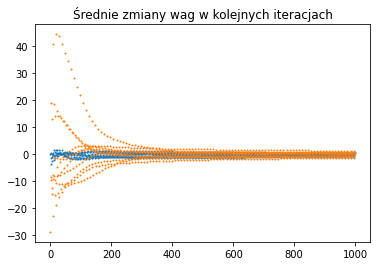

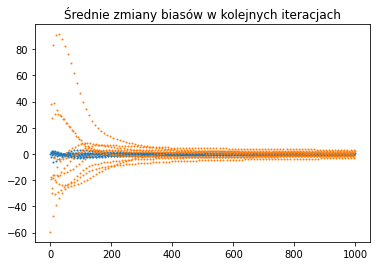

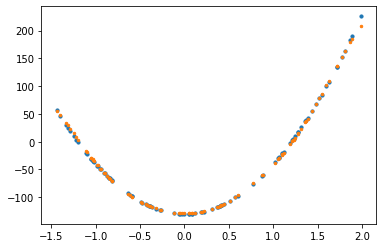

MSE:  6.662446696175367


In [30]:
train_df = pd.read_csv('./dane/regression/square-simple-training.csv', index_col=0)
test_df = pd.read_csv('./dane/regression/square-simple-test.csv', index_col=0)

x = np.asarray(train_df['x']).reshape(-1, 1)
y = np.asarray(train_df['y']).reshape(-1, 1)
x_test = np.asarray(test_df['x']).reshape(-1, 1)
y_test = np.asarray(test_df['y']).reshape(-1, 1)

nn = MLP(neurons = [1,200,1])
nn.learn_batch(x, y, iterations=100, batch_size = 10, learning_rate=0.01)
y_pred = nn.forward(x_test)

dw_mean = nn.dw_mean
db_mean = nn.db_mean

plt.plot(dw_mean, 'o', markersize=1)
plt.title('Średnie zmiany wag w kolejnych iteracjach')
plt.show()

plt.plot(db_mean, 'o', markersize=1)
plt.title('Średnie zmiany biasów w kolejnych iteracjach')
plt.show()

plt.scatter(x_test, y_test, s=10)
plt.scatter(x_test, y_pred, s=6)
plt.show()
print('MSE: ', nn.mse(y_test, y_pred))

In [33]:
neuron_tab = [100+100*x for x in range(5)]
iteration_tab = [100+100*x for x in range(5)]

min_mse = 1000

for i in neuron_tab:
    for j in iteration_tab:
        number_of_neurons=[1, i, 1]

        nn = MLP(neurons = number_of_neurons)
        nn.learn_batch(x, y, iterations=j, batch_size = 10, learning_rate=0.01)
        y_pred = nn.forward(x_test)

        new_mse = nn.mse(y_test, y_pred)
        if new_mse < min_mse:
            # plt.scatter(x_test, y_test, s=10)
            # plt.scatter(x_test, y_pred, s=6)
            # plt.show()
            print('MSE:', new_mse, ' Liczba neuronów:', i, ' Liczba iteracji:', j)
            min_mse = new_mse


MSE: 10.684992338759594  Liczba neuronów: 100  Liczba iteracji: 100
MSE: 5.019310877951906  Liczba neuronów: 100  Liczba iteracji: 200
MSE: 2.9249418317996803  Liczba neuronów: 100  Liczba iteracji: 300
MSE: 1.8536602261575694  Liczba neuronów: 100  Liczba iteracji: 400
MSE: 1.2629338790496478  Liczba neuronów: 100  Liczba iteracji: 500
MSE: 0.9961012047472773  Liczba neuronów: 200  Liczba iteracji: 500
MSE: 0.870723729824549  Liczba neuronów: 300  Liczba iteracji: 500
MSE: 0.7178548185272848  Liczba neuronów: 400  Liczba iteracji: 500
MSE: 0.6860364818845865  Liczba neuronów: 500  Liczba iteracji: 500


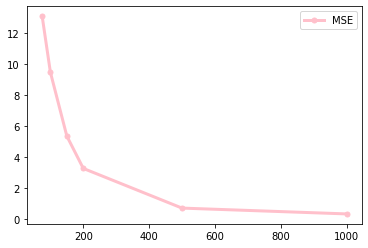

13.1072603718239 9.490036445185215 5.366970286745168 3.2795567241835433 0.7178548185272848 0.341997805306764


In [35]:
iterations_set = [75, 100, 150, 200, 500, 1000]
number_of_neurons=[1, 400, 1]

MSEs = []

for iterations in iterations_set:
    nn = MLP(neurons = number_of_neurons)
    nn.learn_batch(x, y, iterations=iterations, batch_size = 10, learning_rate=0.01)  # uczymy model
    MSEs += [nn.mse(y_test, nn.forward(x_test))]   # dodajemy MSE dla róznych ilosci iteracji

df=pd.DataFrame({'num_of_it': iterations_set, 'MSE': MSEs})
plt.plot( 'num_of_it', 'MSE', data=df, marker='o', markerfacecolor='pink', markersize=5, color='pink', linewidth=3)
plt.legend()
plt.show()
print(*MSEs, sep=' ')

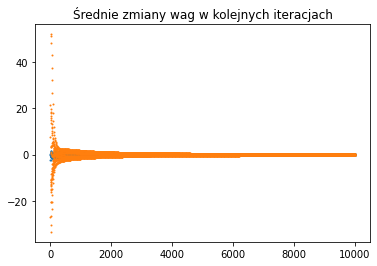

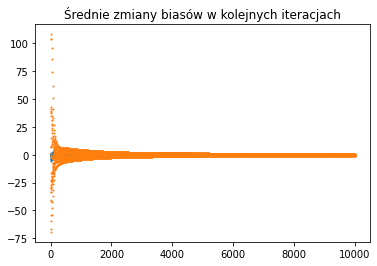

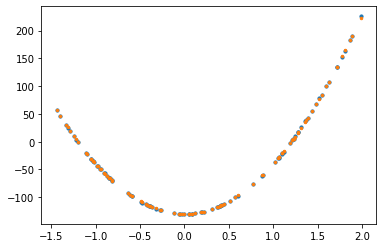

MSE (test): 0.341997805306764    (training): 0.2694839253999772


In [37]:
number_of_neurons=[1, 400, 1]

nn = MLP(neurons = number_of_neurons)
nn.learn_batch(x, y, iterations=1000, batch_size = 10, learning_rate=0.01)
y_pred = nn.forward(x_test)

plt.plot(nn.dw_mean, 'o', markersize=1)
plt.title('Średnie zmiany wag w kolejnych iteracjach')
plt.show()

plt.plot(nn.db_mean, 'o', markersize=1)
plt.title('Średnie zmiany biasów w kolejnych iteracjach')
plt.show()

plt.scatter(x_test, y_test, s=10)
plt.scatter(x_test, y_pred, s=6)
plt.show()
print('MSE (test):', nn.mse(y_test, y_pred), '   (training):', nn.mse(y, nn.forward(x)))

# Steps small

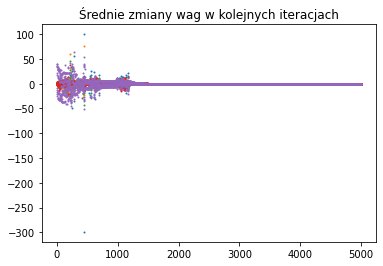

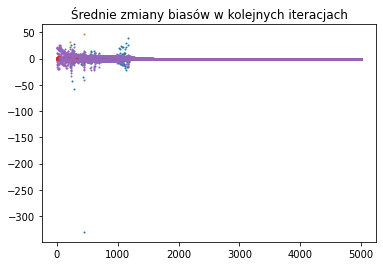

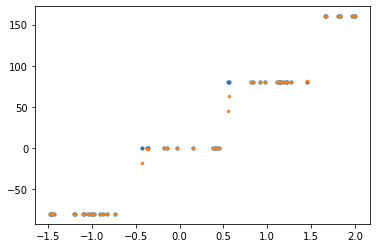

MSE:  37.4775705111917


In [42]:
number_of_neurons=[1, 10, 10, 10, 10, 1]

train_df = pd.read_csv('./dane/regression/steps-small-training.csv', index_col=0)
test_df = pd.read_csv('./dane/regression/steps-small-test.csv', index_col=0)

x = np.asarray(train_df['x']).reshape(-1, 1)
y = np.asarray(train_df['y']).reshape(-1, 1)
x_test = np.asarray(test_df['x']).reshape(-1, 1)
y_test = np.asarray(test_df['y']).reshape(-1, 1)

nn = MLP(neurons = number_of_neurons)
nn.learn_batch(x, y, iterations=1000, batch_size = 10, learning_rate=0.01)
y_pred = nn.forward(x_test)

db_mean = nn.dw_mean
dw_mean = nn.db_mean

plt.plot(dw_mean, 'o', markersize=1)
plt.title('Średnie zmiany wag w kolejnych iteracjach')
plt.show()

plt.plot(db_mean, 'o', markersize=1)
plt.title('Średnie zmiany biasów w kolejnych iteracjach')
plt.show()

plt.scatter(x_test, y_test, s=10)
plt.scatter(x_test, y_pred, s=6)
plt.show()

print('MSE: ', nn.mse(y_test, y_pred))


In [45]:
batchsize_tab = [10+5*x for x in range(100)]
number_of_neurons=[1, 10, 10, 10, 10, 1]

min_mse = 1000
for i in batchsize_tab:
    nn = MLP(neurons = number_of_neurons)
    nn.learn_batch(x, y, iterations=1000, batch_size = i, learning_rate=0.01)
    y_pred = nn.forward(x_test)

    new_mse = nn.mse(y_test, y_pred)
    if new_mse < min_mse:
        # plt.scatter(x_test, y_test, s=10)
        # plt.scatter(x_test, y_pred, s=6)
        # plt.show()
        print('MSE:', new_mse, ' Batch size:', i)
        min_mse = new_mse

MSE: 23.514539185868024  Batch size: 10


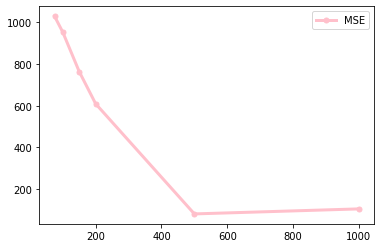

1029.4072440385294 953.1460696342558 763.8260120271909 609.2774371637272 80.96206689944319 105.08631278353003


In [46]:
iterations_set = [75, 100, 150, 200, 500, 1000]
number_of_neurons=[1, 10, 10, 10, 10, 1]
MSEs = []

for iterations in iterations_set:
    nn = MLP(neurons = number_of_neurons)
    nn.learn_batch(x, y, iterations=iterations, batch_size = 20, learning_rate=0.01)
    MSEs += [nn.mse(y_test, nn.forward(x_test))]

df=pd.DataFrame({'num_of_it': iterations_set, 'MSE': MSEs})
plt.plot( 'num_of_it', 'MSE', data=df, marker='o', markerfacecolor='pink', markersize=5, color='pink', linewidth=3)
plt.legend()
plt.show()
print(*MSEs, sep=' ')